In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [27]:
# New Antecedent/Consequent objects hold universe variables and membership functions
# Create the three fuzzy variables - two inputs, one output
PH = ctrl.Antecedent(np.arange(0, 14, 0.25), 'PH')
WaterLevel = ctrl.Antecedent(np.arange(230, 335, 1), 'WaterLevel') # unit --> mm
PH_Pump = ctrl.Consequent(np.arange(0,8,0.06),"PH_Pump") # duration unit --> seconds

C:\Users\badr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


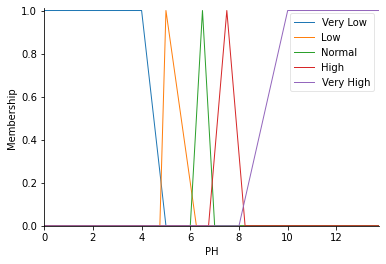

In [3]:
# Generate fuzzy membership functions for first input PH
PH['Very Low'] = fuzz.trapmf(PH.universe,[ 0 , 0 , 4 , 5 ])
PH['Low'] = fuzz.trimf(PH.universe,[ 4.75 , 5 , 6.25 ])
PH['Normal'] = fuzz.trimf(PH.universe,[ 6 , 6.5 , 7 ])
PH['High'] = fuzz.trimf(PH.universe,[ 6.75 , 7.5 , 8.25 ])
PH['Very High'] = fuzz.trapmf(PH.universe,[ 8 , 10 , 14 , 14 ])
PH.view()

C:\Users\badr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


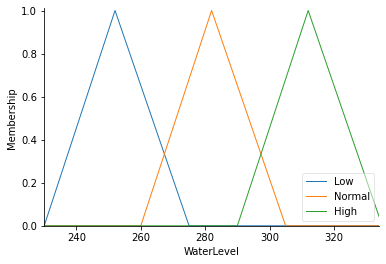

In [4]:
# Generate fuzzy membership functions for second intput water level
# Unit --> mm 
WaterLevel['Low']   = fuzz.trimf(WaterLevel.universe,[230,252,275]) 
WaterLevel['Normal'] = fuzz.trimf(WaterLevel.universe,[260,282,305]) 
WaterLevel['High']    = fuzz.trimf(WaterLevel.universe,[290,312,335]) 
WaterLevel.view()

C:\Users\badr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


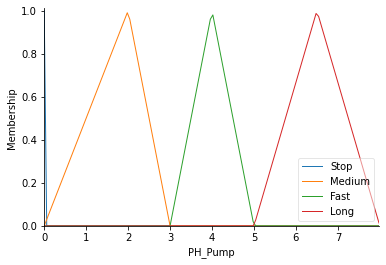

In [26]:
# Generate fuzzy membership functions for output PH Pump Duration
PH_Pump["Stop"] = fuzz.trimf(PH_Pump.universe,[ 0,0,0])
PH_Pump["Medium"] = fuzz.trimf(PH_Pump.universe,[ 0,2,3])
PH_Pump["Fast"] = fuzz.trimf(PH_Pump.universe,[ 3,4,5])
PH_Pump["Long"] = fuzz.trimf(PH_Pump.universe,[ 5,6.5,8])
PH_Pump.view()

In [6]:
#Define Rules

rules = []
rules.append(ctrl.Rule(WaterLevel['Low'] | PH['Very Low'], PH_Pump['Medium']))
rules.append(ctrl.Rule(WaterLevel['Low'] | PH['Low'], PH_Pump['Fast']))
rules.append(ctrl.Rule(WaterLevel['Low'] | PH['High'], PH_Pump['Fast']))
rules.append(ctrl.Rule(WaterLevel['Low'] | PH['Very High'], PH_Pump['Medium']))

rules.append(ctrl.Rule(WaterLevel['Normal'] | PH['Very Low'], PH_Pump['Medium']))
rules.append(ctrl.Rule(WaterLevel['Normal'] | PH['Low'], PH_Pump['Medium']))
rules.append(ctrl.Rule(WaterLevel['Normal'] | PH['High'], PH_Pump['Medium']))
rules.append(ctrl.Rule(WaterLevel['Normal'] | PH['Very High'], PH_Pump['Medium']))

rules.append(ctrl.Rule(WaterLevel['High'] | PH['Very Low'], PH_Pump['Long']))
rules.append(ctrl.Rule(WaterLevel['High'] | PH['Low'], PH_Pump['Medium']))
rules.append(ctrl.Rule(WaterLevel['High'] | PH['High'], PH_Pump['Medium']))
rules.append(ctrl.Rule(WaterLevel['High'] | PH['Very High'],PH_Pump['Long']))


In [7]:
# create a control system via:
PH_Pump_Du_ctrl = ctrl.ControlSystem(rules)

In [8]:
#In order to simulate this control system, we will create a ControlSystemSimulation. 
PH_Pump_Du_sim = ctrl.ControlSystemSimulation(PH_Pump_Du_ctrl)

In [9]:
PH_Pump_Du_sim.input['PH'] = 8
PH_Pump_Du_sim.input['WaterLevel'] = 200
PH_Pump_Du_sim.compute()

In [10]:
PH_Pump_Du_sim.output['PH_Pump']

2.5466666666666664

C:\Users\badr\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


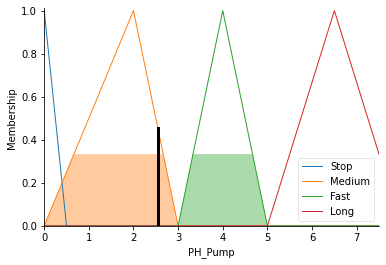

In [11]:
PH_Pump.view(sim=PH_Pump_Du_sim)

In [12]:
    #Ref: 
#https://www.researchgate.net/profile/Nico-Surantha/publication/335861668_Intelligent_Monitoring_and_Controlling_System_for_Hydroponics_Precision_Agriculture/links/5e8c079f92851c2f52868179/Intelligent-Monitoring-and-Controlling-System-for-Hydroponics-Precision-Agriculture.pdf
#https://www.researchgate.net/publication/338430382_An_Optimization_Scheme_Based_on_Fuzzy_Logic_Control_for_Efficient_Energy_Consumption_in_Hydroponics_Environment